In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import BSE

In [2]:
def make_trader_spec():
    """
    12 buyers, 12 sellers with mix of ZIP, SHVR, ZIC
    """
    return {
        'buyers': [
            ('ZIP', 4), ('SHVR', 4), ('ZIC', 4)
        ],
        'sellers': [
            ('ZIP', 4), ('SHVR', 4), ('ZIC', 4)
        ]
    }

In [3]:
def make_schedule_5A():
    """
    Vernon Smith Chart 5A (Before Shock)
    Demand: descending (350–300)
    Supply: ascending (100–200)
    """

    demand_prices = [(350,2),(340,2),(330,2),(320,2),(310,2),(300,2)]
    supply_prices = [(100,2),(120,2),(140,2),(160,2),(180,2),(200,2)]

    demand = []
    supply = []

    t = 0
    dt = 80  

    for price,qty in demand_prices:
        demand.append({'from': t, 'to': t+dt, 'ranges': [(price,0)], 'stepmode':'fixed'})
        t += dt

    t = 0
    for price,qty in supply_prices:
        supply.append({'from': t, 'to': t+dt, 'ranges': [(price,0)], 'stepmode':'fixed'})
        t += dt

    return {
        'sup': supply,
        'dem': demand,
        'interval': 1,
        'timemode': 'periodic'
    }


def make_schedule_5B():
    """
    Vernon Smith Chart 5B (After Shock)
    Demand increases (shock)
    New demand: 400–300
    """

    demand_prices = [(400,2),(380,2),(360,2),(340,2),(320,2),(300,2)]
    supply_prices = [(100,2),(120,2),(140,2),(160,2),(180,2),(200,2)]

    demand = []
    supply = []

    t = 0
    dt = 80

    for price,qty in demand_prices:
        demand.append({'from': t, 'to': t+dt, 'ranges': [(price,0)], 'stepmode':'fixed'})
        t += dt

    t = 0
    for price,qty in supply_prices:
        supply.append({'from': t, 'to': t+dt, 'ranges': [(price,0)], 'stepmode':'fixed'})
        t += dt

    return {
        'sup': supply,
        'dem': demand,
        'interval': 1,
        'timemode': 'periodic'
    }

In [4]:
def run_market(sess_id, schedule, duration=400):

    trader_spec = {
        'buyers': [('ZIP', 10)],
        'sellers': [('ZIP', 10)]
    }

    dump_flags = {
        'dump_strats': False,
        'dump_lobs': False,
        'dump_blotters': False,
        'dump_avgbals': False,
        'dump_tape': True
    }

    BSE.market_session(
        sess_id,
        0,
        duration,
        trader_spec,
        schedule,
        dump_flags,
        False
    )

    df = pd.read_csv(f"{sess_id}_tape.csv")
    print("Detected columns:", df.columns)

    cols = df.columns

    time_col = cols[1]
    price_col = cols[2]

    print("Using time_col =", time_col)
    print("Using price_col =", price_col)

    times = df[time_col].astype(float).to_numpy()
    prices = df[price_col].astype(float).to_numpy()

    return prices, times


In [5]:
schedule_A = make_schedule_5A()
schedule_B = make_schedule_5B()

prices_A, times_A = run_market("Test5A", schedule_A)
prices_B, times_B = run_market("Test5B", schedule_B)

Detected columns: Index(['Trd', ' 000001.050', ' 241'], dtype='object')
Using time_col =  000001.050
Using price_col =  241
Detected columns: Index(['Trd', ' 000001.150', ' 221'], dtype='object')
Using time_col =  000001.150
Using price_col =  221


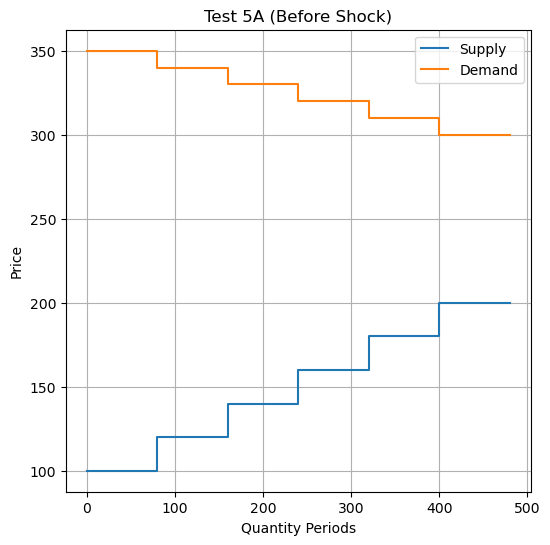

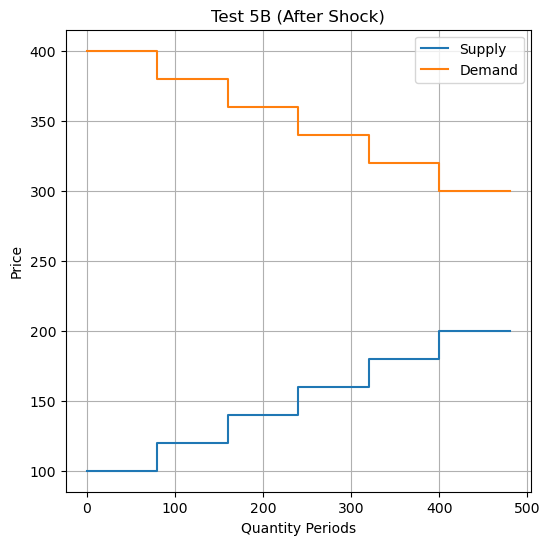

In [6]:
def plot_step_schedule(schedule, title):
    plt.figure(figsize=(6,6))

    xs = []
    ys = []
    for zone in schedule['sup']:
        xs.extend([zone['from'], zone['to']])
        ys.extend([zone['ranges'][0][0]]*2)
    plt.plot(xs, ys, drawstyle='steps-post', label="Supply")

    xs = []
    ys = []
    for zone in schedule['dem']:
        xs.extend([zone['from'], zone['to']])
        ys.extend([zone['ranges'][0][0]]*2)
    plt.plot(xs, ys, drawstyle='steps-post', label="Demand")

    plt.title(title)
    plt.xlabel("Quantity Periods")
    plt.ylabel("Price")
    plt.legend()
    plt.grid(True)
    plt.show()


plot_step_schedule(schedule_A, "Test 5A (Before Shock)")
plot_step_schedule(schedule_B, "Test 5B (After Shock)")

In [7]:
schedule_A = make_schedule_5A()
schedule_B = make_schedule_5B()

In [8]:
prices_A, times_A = run_market("Test5A", schedule_A)
prices_B, times_B = run_market("Test5B", schedule_B)

Detected columns: Index(['Trd', ' 000001.150', ' 1'], dtype='object')
Using time_col =  000001.150
Using price_col =  1
Detected columns: Index(['Trd', ' 000001.100', ' 1'], dtype='object')
Using time_col =  000001.100
Using price_col =  1


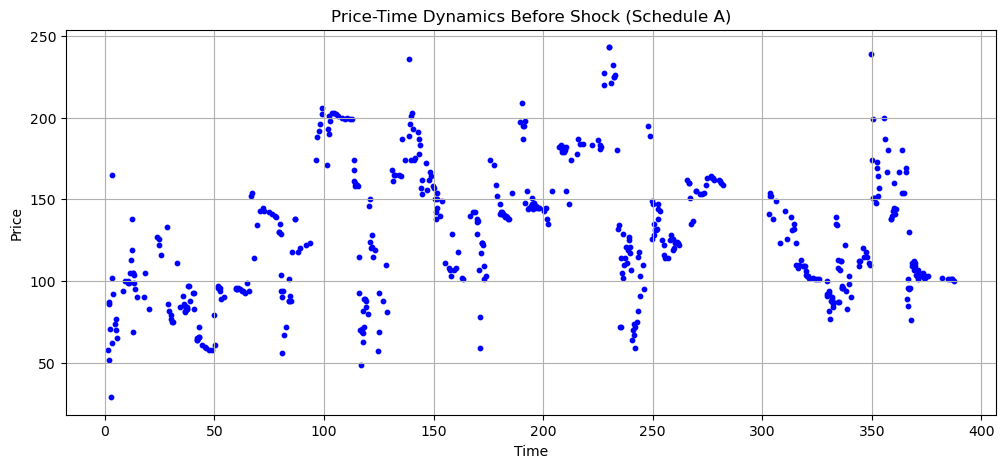

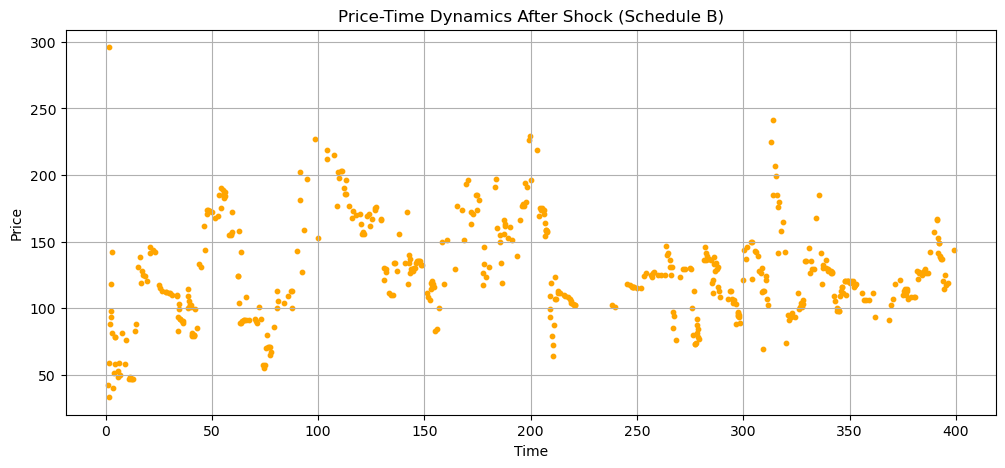

In [10]:
plt.figure(figsize=(12,5))
plt.scatter(times_A, prices_A, s=10, c='blue')
plt.title("Price-Time Dynamics Before Shock (Schedule A)")
plt.xlabel("Time")
plt.ylabel("Price")
plt.grid(True)
plt.show()


plt.figure(figsize=(12,5))
plt.scatter(times_B, prices_B, s=10, c='orange')
plt.title("Price-Time Dynamics After Shock (Schedule B)")
plt.xlabel("Time")
plt.ylabel("Price")
plt.grid(True)
plt.show()